In [1]:
import tensorflow as tf

## Get the data

In [2]:
! mkdir .kaggle

In [4]:
! chmod 600 .kaggle/kaggle.json

In [5]:
! kaggle datasets download techsash/waste-classification-data/

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data/versions/
License(s): CC-BY-SA-4.0
 98% 419M/427M [00:04<00:00, 126MB/s]
100% 427M/427M [00:04<00:00, 101MB/s]


In [6]:
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [7]:
test_path = '/content/dataset/DATASET/TEST'
train_path = '/content/dataset/DATASET/TRAIN'

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:

# Load the first 10 images from train
images = []
for dir in os.listdir(train_path):
  count = 0
  for image in os.listdir(train_path + '/' + dir):
    print(train_path + '/' + dir + '/' + image)
    images.append(np.array(Image.open(train_path + '/' + dir + '/' + image)))
    if count == 4:
      break
    count += 1




/content/dataset/DATASET/TRAIN/R/R_3702.jpg
/content/dataset/DATASET/TRAIN/R/R_4743.jpg
/content/dataset/DATASET/TRAIN/R/R_2305.jpg
/content/dataset/DATASET/TRAIN/R/R_4610.jpg
/content/dataset/DATASET/TRAIN/R/R_6983.jpg
/content/dataset/DATASET/TRAIN/O/O_415.jpg
/content/dataset/DATASET/TRAIN/O/O_5856.jpg
/content/dataset/DATASET/TRAIN/O/O_3089.jpg
/content/dataset/DATASET/TRAIN/O/O_9137.jpg
/content/dataset/DATASET/TRAIN/O/O_4647.jpg


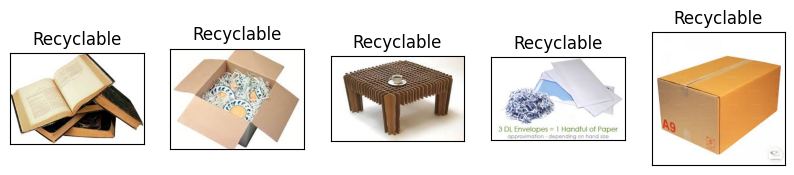

In [25]:
# Plot all of the images, first row is recyclable, second row is non recyclable

plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i])
  if i < 5:
    plt.title('Recyclable')
  else:
    plt.title('Non Recyclable')
plt.show()

## Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## No Dropout and Using MaxPooling

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Will test without dropout layer first
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)              

## Train

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='logs')